In [60]:
import pandas as pn
import numpy as np

PATH_TO_FOLDER_DATA = '../data/Mati/lol_2024-11-11T12-10-07/'

SAMPLING_RATE = 25 
DELAY = -15 # difference between game and timers in seconds

In [61]:
import json

with open(f"{PATH_TO_FOLDER_DATA}/meta.json", "r") as f:
    meta = json.load(f)
meta

{'markers': {'0': 'none', '1': 'kill', '2': 'death', '3': 'random flash'},
 'subject': 'subject_1'}

In [62]:
import os
def sort_imgs(imgs: list[str]) -> list[str]:
    return sorted(imgs, key=lambda x: int(x.split('_')[-1].split('.')[0]))

def list_files(dir=PATH_TO_FOLDER_DATA):
    files = os.listdir(dir)
    csv_file = [f for f in files if f.endswith('.csv')][0]
    imgs = [f for f in files if f.endswith('.png')]
    return csv_file, sort_imgs(imgs)

csv_file, imgs = list_files()
data = pn.read_csv(os.path.join(PATH_TO_FOLDER_DATA, csv_file))


In [63]:
# data.iloc[:, -1]
data.iloc[:, -1] = data.iloc[:, -1].astype(str)
data.iloc[:, -1] = data.iloc[:, -1].replace(meta['markers'])
np.unique(data.iloc[:, -1])

C:\Users\kuban\AppData\Local\Temp\ipykernel_14728\3630301711.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
35637    0
35638    0
35639    0
35640    0
35641    0
Name: 0, Length: 35642, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, -1] = data.iloc[:, -1].astype(str)


array(['death', 'kill', 'none'], dtype=object)

In [64]:
imgs

['death_0.png',
 'kill_0.png',
 'death_1.png',
 'kill_1.png',
 'death_2.png',
 'kill_2.png',
 'death_3.png',
 'kill_3.png',
 'death_4.png',
 'kill_4.png',
 'death_5.png',
 'kill_5.png',
 'death_6.png',
 'kill_6.png',
 'death_7.png',
 'kill_7.png',
 'death_8.png',
 'kill_8.png',
 'death_9.png',
 'kill_9.png',
 'death_10.png',
 'kill_10.png',
 'death_11.png',
 'kill_11.png',
 'death_12.png',
 'kill_12.png',
 'death_13.png',
 'kill_13.png',
 'death_14.png',
 'kill_14.png',
 'death_15.png',
 'kill_15.png',
 'death_16.png',
 'kill_16.png',
 'death_17.png',
 'kill_17.png',
 'death_18.png',
 'kill_18.png',
 'death_19.png',
 'kill_19.png',
 'death_20.png',
 'kill_20.png',
 'death_21.png',
 'kill_21.png',
 'death_22.png',
 'kill_22.png',
 'death_23.png',
 'kill_23.png',
 'death_24.png',
 'kill_24.png',
 'death_25.png',
 'kill_25.png',
 'death_26.png',
 'kill_26.png',
 'death_27.png',
 'kill_27.png',
 'death_28.png',
 'kill_28.png',
 'death_29.png',
 'kill_29.png',
 'death_30.png',
 'kill_30.png

In [65]:
def get_time(value):
    value += DELAY * SAMPLING_RATE
    minutes = value // (60 * SAMPLING_RATE)
    seconds = (value % (60 * SAMPLING_RATE)) // SAMPLING_RATE
    return f'{minutes}:{seconds}'

class Event:
    def __init__(self, index, img):
        self.index = index
        self.img = img
    def __repr__(self):
        return f'{get_time(self.index)} - {self.img}'
    
events_col = data.iloc[:, -1].astype(str)

event_names = np.unique(events_col)
event_names = event_names[event_names != '0']

ids = {e : events_col[events_col == e].index for e in event_names}
events: dict[str, list[Event]] = {name: [] for name in event_names}

for name in events:
    counter = 0
    event_imgs = list(filter(lambda e: name in e, imgs))

    if len(event_imgs) > len(ids[name]):
        raise IndexError(f"screenshotMarker started before EEGRecorder. To fix the issue delete a file: '{event_imgs[0]}")

    if len(event_imgs) < len(ids[name]):
        print('Warning: EEGRecorder has more markers within than number of images')

    for img in event_imgs:
            event = Event(index=ids[name][counter], img=img)
            events[name].append(event)
            counter += 1

events

{'death': [2:18 - death_0.png,
  3:40 - death_1.png,
  4:36 - death_2.png,
  5:29 - death_3.png,
  7:19 - death_4.png,
  7:54 - death_5.png,
  8:15 - death_6.png,
  10:13 - death_7.png,
  12:54 - death_8.png,
  14:8 - death_9.png,
  14:13 - death_10.png,
  15:36 - death_11.png,
  15:58 - death_12.png,
  16:2 - death_13.png,
  16:51 - death_14.png,
  17:42 - death_15.png,
  19:54 - death_16.png,
  22:59 - death_17.png,
  23:16 - death_18.png,
  23:16 - death_19.png,
  23:16 - death_20.png,
  23:16 - death_21.png,
  23:16 - death_22.png,
  23:16 - death_23.png,
  23:17 - death_24.png,
  23:17 - death_25.png,
  23:17 - death_26.png,
  23:17 - death_27.png,
  23:17 - death_28.png,
  23:18 - death_29.png,
  23:18 - death_30.png,
  23:18 - death_31.png,
  23:18 - death_32.png,
  23:18 - death_33.png,
  23:18 - death_34.png,
  23:20 - death_35.png,
  23:20 - death_36.png],
 'kill': [2:18 - kill_0.png,
  4:35 - kill_1.png,
  7:54 - kill_2.png,
  8:9 - kill_3.png,
  12:2 - kill_4.png,
  15:59 -

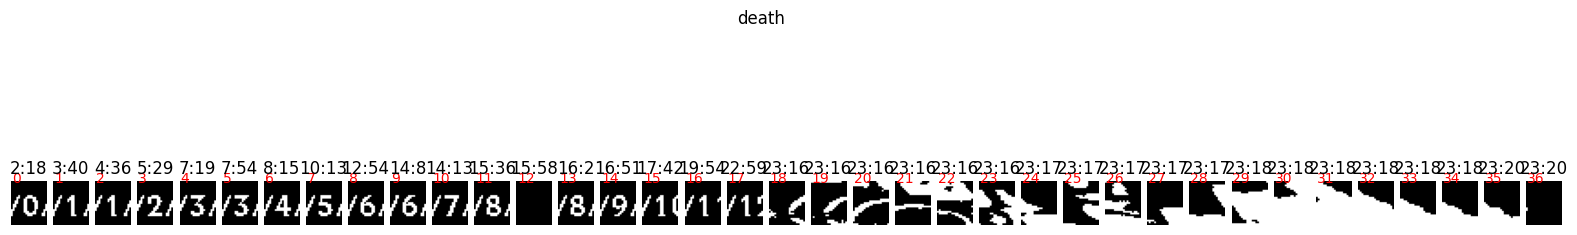

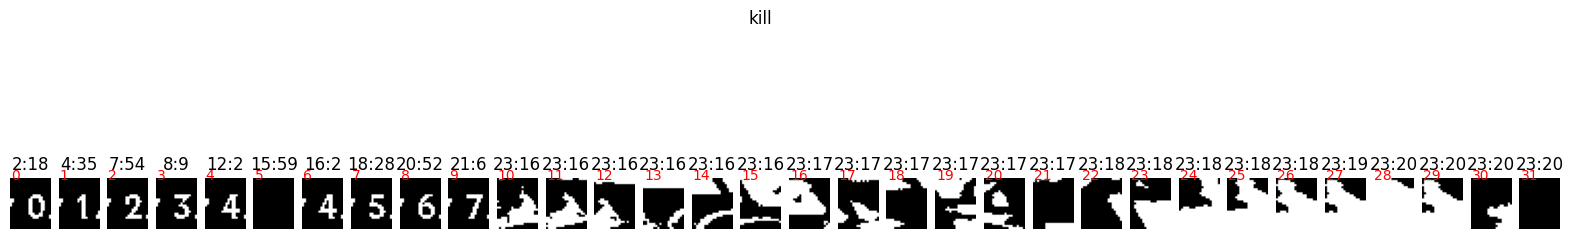

In [66]:
import matplotlib.pyplot as plt

def show_events(events):
    for event_name in events:
        n = len(events[event_name])
        if n == 0:
            continue
        
        fig, axs = plt.subplots(1, n, figsize=(20, 4))
        if n == 1:
            axs = [axs]

        fig.suptitle(event_name)
        for i, event in enumerate(events[event_name]):
            axs[i].imshow(plt.imread(os.path.join(PATH_TO_FOLDER_DATA, event.img)), cmap='gray')
            axs[i].set_title(get_time(event.index))
            axs[i].text(0, 0, i, color='red')
            axs[i].axis('off')
        plt.show()
show_events(events)

## Pass indexes (starting from 0) that should be cleared

In [67]:
TO_BE_CLEARED = {
    'death': [0,2,5,9,12,13,*list(range(18, 37))],
    'kill': [0,5,6, *list(range(10,32))],
}
for event_type in TO_BE_CLEARED:
    print(f"{event_type}: {TO_BE_CLEARED[event_type]}")

death: [0, 2, 5, 9, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
kill: [0, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Events after clearing:


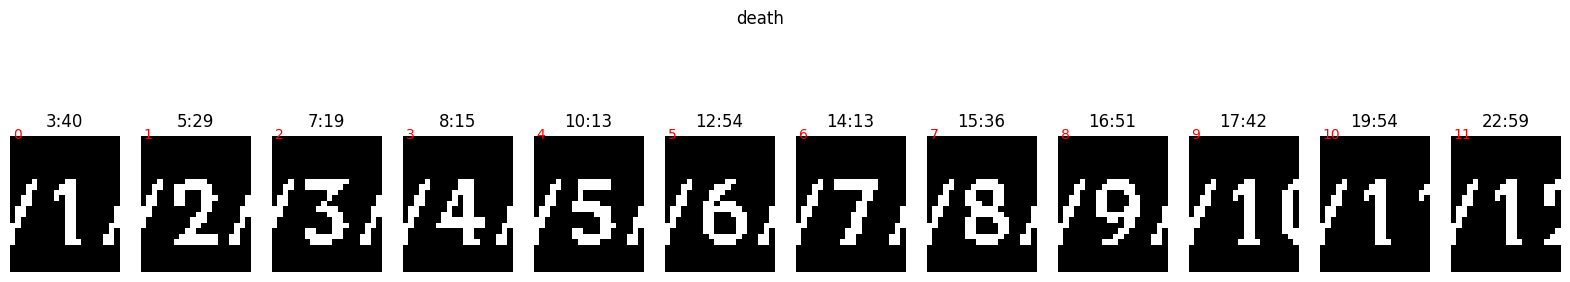

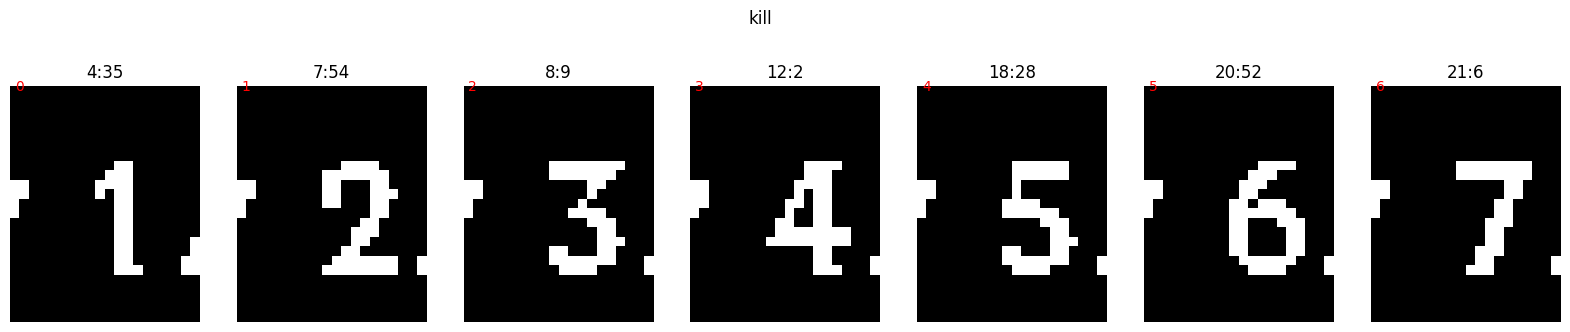

In [68]:
import shutil

def clear_marker(id_to_clear, new_value=0):
    data.iloc[id_to_clear, -1] = new_value

answer = input('Do you want to clear the following events? (yes/no)\n' + '\n'.join([f'{name}: {TO_BE_CLEARED[name]}' for name in TO_BE_CLEARED]) + '\n')
if answer != 'yes':
    print('No events were cleared')
else:
    os.makedirs(os.path.join(PATH_TO_FOLDER_DATA, 'archive'), exist_ok=True)
    shutil.copy(os.path.join(PATH_TO_FOLDER_DATA, csv_file), os.path.join(PATH_TO_FOLDER_DATA, 'archive', csv_file))

    for name in TO_BE_CLEARED:
        for i in TO_BE_CLEARED[name]:
            clear_marker(events[name][i].index)
            os.rename(os.path.join(PATH_TO_FOLDER_DATA, events[name][i].img), os.path.join(PATH_TO_FOLDER_DATA, 'archive', events[name][i].img))
        events[name] = [e for i, e in enumerate(events[name]) if i not in TO_BE_CLEARED[name]]

    data.to_csv(os.path.join(PATH_TO_FOLDER_DATA, csv_file), index=False)
    
    print('Events after clearing:')
    show_events(events)